In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [22]:
import matplotlib.pyplot as plt

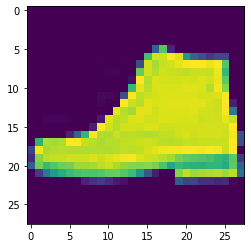

9


In [27]:
plt.imshow(train_imagesi[42,:,:])
plt.show()
print(train_labels[42])

# Задание 1. 

### Зависимость от числа нейронов в слое (для 2-хслойной сети)

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 1.7192 - accuracy: 0.5601 - val_loss: 1.2574 - val_accuracy: 0.7222
Epoch 2/15
165/165 [==============================] - 1s 6ms/step - loss: 1.1713 - accuracy: 0.7363 - val_loss: 1.0082 - val_accuracy: 0.7512
Epoch 3/15
165/165 [==============================] - 1s 6ms/step - loss: 0.9465 - accuracy: 0.7727 - val_loss: 0.8430 - val_accuracy: 0.7867
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.7948 - accuracy: 0.8017 - val_loss: 0.7469 - val_accuracy: 0.8163
Epoch 5/15
165/165 [==============================] - 1s 6ms/step - loss: 0.7075 - accuracy: 0.8204 - val_loss: 0.6529 - val_accuracy: 0.8256
Epoch 6/15
165/165 [==============================] - 1s 6ms/step - loss: 0.6206 - accuracy: 0.8376 - val_loss: 0.5963 - val_accuracy: 0.8479
Epoch 7/15
165/165 [==============================] - 1s 7ms/step - loss: 0.5598 - accuracy: 0.8557 - val_loss: 0.5410 - val_accuracy: 0.8575
Epoch 

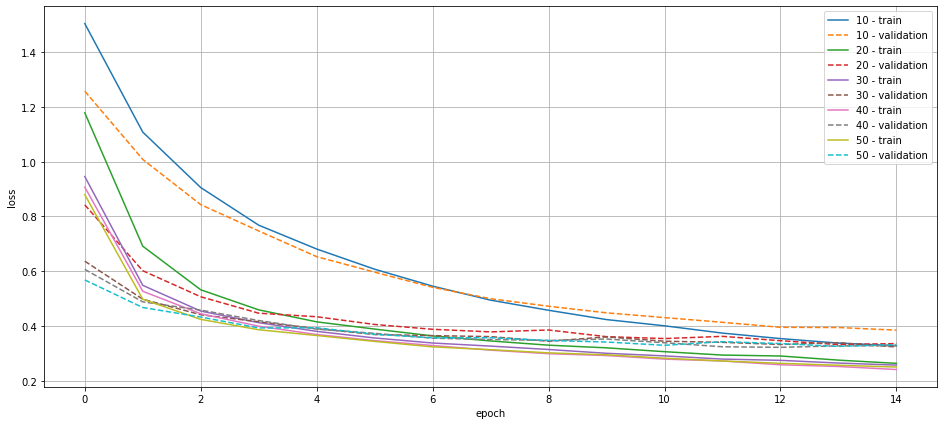

In [45]:
plt.figure(figsize=(16,7))

epochs = 15

result = []
for neuron_num in [10, 20, 30, 40, 50]:
  
  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [46]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
2,Model of 30 neurons,0.909619,0.887000
3,Model of 40 neurons,0.914405,0.883667
1,Model of 20 neurons,0.909286,0.881611
4,Model of 50 neurons,0.909714,0.880889
0,Model of 10 neurons,0.897405,0.878667


В двуслойной модели увеличение количества нейронов в скрытом слое повышает точность обучения на тренировочной выборке. Однако наилучшая точность на валидационной выборке - при 30 нейронах в скрытом слое, что, по всей видимости, говорит о переобучении, при большем количестве нейроов

### Зависимость от числа слоев

In [52]:
neuron_num = 30
result = []

In [53]:
# 2-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '2-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 1.2927 - accuracy: 0.6261 - val_loss: 0.6646 - val_accuracy: 0.8129
Epoch 2/15
165/165 [==============================] - 1s 7ms/step - loss: 0.6070 - accuracy: 0.8240 - val_loss: 0.5110 - val_accuracy: 0.8386
Epoch 3/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4899 - accuracy: 0.8425 - val_loss: 0.4500 - val_accuracy: 0.8502
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4258 - accuracy: 0.8584 - val_loss: 0.4146 - val_accuracy: 0.8626
Epoch 5/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3892 - accuracy: 0.8687 - val_loss: 0.3908 - val_accuracy: 0.8698
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3555 - accuracy: 0.8791 - val_loss: 0.3771 - val_accuracy: 0.8711
Epoch 7/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3378 - accuracy: 0.8826 - val_loss: 0.3759 - val_accuracy: 0.8682
Epoch 

In [54]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '3-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 1.9616 - accuracy: 0.4471 - val_loss: 1.2003 - val_accuracy: 0.7749
Epoch 2/15
165/165 [==============================] - 1s 7ms/step - loss: 1.0486 - accuracy: 0.7968 - val_loss: 0.7489 - val_accuracy: 0.8248
Epoch 3/15
165/165 [==============================] - 1s 7ms/step - loss: 0.6734 - accuracy: 0.8386 - val_loss: 0.5526 - val_accuracy: 0.8452
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.5120 - accuracy: 0.8548 - val_loss: 0.4704 - val_accuracy: 0.8558
Epoch 5/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4421 - accuracy: 0.8647 - val_loss: 0.4215 - val_accuracy: 0.8648
Epoch 6/15
165/165 [==============================] - 1s 8ms/step - loss: 0.3814 - accuracy: 0.8776 - val_loss: 0.3941 - val_accuracy: 0.8692
Epoch 7/15
165/165 [==============================] - 1s 8ms/step - loss: 0.3509 - accuracy: 0.8844 - val_loss: 0.3770 - val_accuracy: 0.8725
Epoch 

In [55]:
# 5-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '5-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 2.2972 - accuracy: 0.1749 - val_loss: 1.8751 - val_accuracy: 0.2816
Epoch 2/15
165/165 [==============================] - 1s 7ms/step - loss: 1.7153 - accuracy: 0.3645 - val_loss: 1.3088 - val_accuracy: 0.5686
Epoch 3/15
165/165 [==============================] - 1s 8ms/step - loss: 1.2110 - accuracy: 0.5901 - val_loss: 1.0163 - val_accuracy: 0.7107
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.9565 - accuracy: 0.7151 - val_loss: 0.8444 - val_accuracy: 0.7629
Epoch 5/15
165/165 [==============================] - 1s 7ms/step - loss: 0.7904 - accuracy: 0.7667 - val_loss: 0.7273 - val_accuracy: 0.7794
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.6854 - accuracy: 0.7845 - val_loss: 0.6541 - val_accuracy: 0.8003
Epoch 7/15
165/165 [==============================] - 1s 8ms/step - loss: 0.6106 - accuracy: 0.8067 - val_loss: 0.6086 - val_accuracy: 0.8042
Epoch 

In [56]:
# 10-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '10-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 3s 9ms/step - loss: 2.3250 - accuracy: 0.1527 - val_loss: 1.8742 - val_accuracy: 0.3944
Epoch 2/15
165/165 [==============================] - 1s 8ms/step - loss: 1.7601 - accuracy: 0.3860 - val_loss: 1.4046 - val_accuracy: 0.4890
Epoch 3/15
165/165 [==============================] - 1s 7ms/step - loss: 1.2928 - accuracy: 0.5433 - val_loss: 1.0577 - val_accuracy: 0.5632
Epoch 4/15
165/165 [==============================] - 1s 8ms/step - loss: 1.0092 - accuracy: 0.5718 - val_loss: 0.9502 - val_accuracy: 0.5590
Epoch 5/15
165/165 [==============================] - 1s 8ms/step - loss: 0.9056 - accuracy: 0.5747 - val_loss: 0.8699 - val_accuracy: 0.6005
Epoch 6/15
165/165 [==============================] - 1s 8ms/step - loss: 0.8537 - accuracy: 0.6069 - val_loss: 0.8009 - val_accuracy: 0.6528
Epoch 7/15
165/165 [==============================] - 1s 7ms/step - loss: 0.7578 - accuracy: 0.7375 - val_loss: 0.6433 - val_accuracy: 0.8141
Epoch 

In [58]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy', 'test_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy,test_accuracy
1,3-слойная сеть,0.912190,0.880389,0.8719
0,2-слойная сеть,0.909619,0.878667,0.8719
3,10-слойная сеть,0.899571,0.872556,0.8629
2,5-слойная сеть,0.878310,0.854833,0.8459


Самая высокая точность у 3х слойной модели

#Задание 2

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 1.9894 - accuracy: 0.3945 - val_loss: 1.2883 - val_accuracy: 0.7686
Epoch 2/15
165/165 [==============================] - 1s 7ms/step - loss: 1.1415 - accuracy: 0.7786 - val_loss: 0.8040 - val_accuracy: 0.8007
Epoch 3/15
165/165 [==============================] - 1s 8ms/step - loss: 0.7284 - accuracy: 0.8125 - val_loss: 0.6058 - val_accuracy: 0.8314
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.5567 - accuracy: 0.8451 - val_loss: 0.4959 - val_accuracy: 0.8514
Epoch 5/15
165/165 [==============================] - 1s 8ms/step - loss: 0.4733 - accuracy: 0.8586 - val_loss: 0.4493 - val_accuracy: 0.8572
Epoch 6/15
165/165 [==============================] - 1s 8ms/step - loss: 0.4198 - accuracy: 0.8685 - val_loss: 0.4166 - val_accuracy: 0.8623
Epoch 7/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3787 - accuracy: 0.8791 - val_loss: 0.3916 - val_accuracy: 0.8698
Epoch 

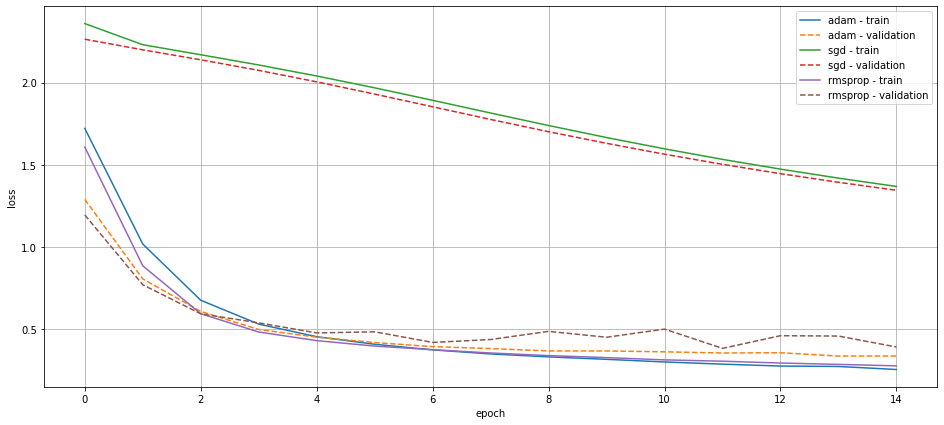

In [59]:
plt.figure(figsize=(16,7))

epochs = 15
neuron_num = 30

optimizers = ['adam', 'sgd', 'rmsprop']

result = []
for opt in optimizers:
  
  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} optimizers'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [60]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
0,Model with adam optimizers,0.912929,0.883222
2,Model with rmsprop optimizers,0.901286,0.861667
1,Model with sgd optimizers,0.660548,0.665278


Лучший результат показал оптимизатор 'Adam'. Близко к нему, по результатам оказался оптимизатор 'RMSProp', однако из графика видно, что, в отличии от 'Adam', его фунция потерь не является монотонно убывающе на валидационной выборке

Таким образом, на качетво модели может все три параметра - число нейронов с скрытом слое, число слоев и оптимизатор. Однако не всегда простое увеличение числа нейронов и слоев ведет к повышению точности.
 Для данной задаци, наилучшие результаты оказались числе нейронов 30, 3х слоях и оптимизаторе 'Adam'

#Задание 4

In [64]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256, 
    validation_split=0.3
)

Epoch 1/15
165/165 [==============================] - 2s 9ms/step - loss: 2.0182 - accuracy: 0.4495 - val_loss: 1.2371 - val_accuracy: 0.7772
Epoch 2/15
165/165 [==============================] - 1s 8ms/step - loss: 1.0742 - accuracy: 0.7884 - val_loss: 0.7386 - val_accuracy: 0.8184
Epoch 3/15
165/165 [==============================] - 1s 7ms/step - loss: 0.6804 - accuracy: 0.8246 - val_loss: 0.5654 - val_accuracy: 0.8427
Epoch 4/15
165/165 [==============================] - 1s 7ms/step - loss: 0.5271 - accuracy: 0.8509 - val_loss: 0.4850 - val_accuracy: 0.8499
Epoch 5/15
165/165 [==============================] - 1s 8ms/step - loss: 0.4474 - accuracy: 0.8628 - val_loss: 0.4263 - val_accuracy: 0.8660
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4037 - accuracy: 0.8712 - val_loss: 0.4102 - val_accuracy: 0.8648
Epoch 7/15
165/165 [==============================] - 1s 8ms/step - loss: 0.3654 - accuracy: 0.8795 - val_loss: 0.3868 - val_accuracy: 0.8708
Epoch 

In [66]:
test_pred = np.argmax(model.predict(test_images), axis=1)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.98      0.97      0.97      1000
           2       0.81      0.77      0.79      1000
           3       0.83      0.91      0.87      1000
           4       0.77      0.82      0.80      1000
           5       0.96      0.94      0.95      1000
           6       0.74      0.59      0.66      1000
           7       0.94      0.91      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [69]:
print()

[[861   1  12  44   4   0  67   0  11   0]
 [  2 966   0  26   2   0   2   0   2   0]
 [ 15   3 771  15 119   0  71   0   6   0]
 [ 27  10   9 910  21   0  20   0   3   0]
 [  1   1  77  48 822   0  48   0   3   0]
 [  0   1   0   0   0 940   0  26   3  30]
 [176   2  78  41  96   0 592   0  15   0]
 [  0   0   0   0   0  30   0 909   1  60]
 [  1   2   2   8   3   2   5   3 973   1]
 [  0   0   0   0   0   6   0  24   1 969]]


In [75]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,7))
    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

Confusion matrix, without normalization
[[861   1  12  44   4   0  67   0  11   0]
 [  2 966   0  26   2   0   2   0   2   0]
 [ 15   3 771  15 119   0  71   0   6   0]
 [ 27  10   9 910  21   0  20   0   3   0]
 [  1   1  77  48 822   0  48   0   3   0]
 [  0   1   0   0   0 940   0  26   3  30]
 [176   2  78  41  96   0 592   0  15   0]
 [  0   0   0   0   0  30   0 909   1  60]
 [  1   2   2   8   3   2   5   3 973   1]
 [  0   0   0   0   0   6   0  24   1 969]]


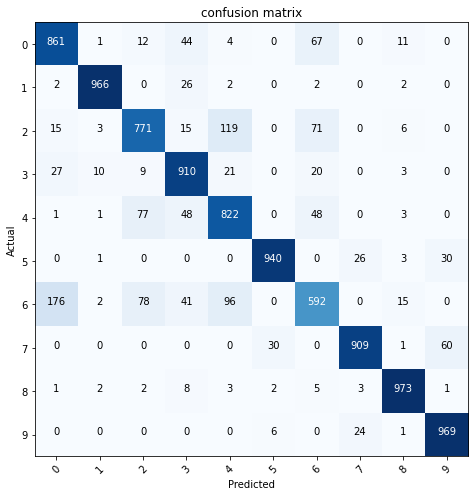

In [77]:
cm = confusion_matrix(test_labels, test_pred)
plot_confusion_matrix(cm, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])